# Winter 2021 Data Science Intern Challenge 

## Question 1: 

Given some sample data, write a program to answer the following: [click here](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0) to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Topics for challenge:**
1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
2. What metric would you report for this dataset?
3. What is its value?


In [1]:
# import nessasary libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [2]:
# read our data set about shops
df = pd.read_csv('Data/data.csv')
df.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [3]:
#check what data types we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
order_id          5000 non-null int64
shop_id           5000 non-null int64
user_id           5000 non-null int64
order_amount      5000 non-null int64
total_items       5000 non-null int64
payment_method    5000 non-null object
created_at        5000 non-null object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [4]:
# convert object type to datatime for created_at field
df['created_at'] = pd.to_datetime(df['created_at'])

In [5]:
# check Null/Nan values
df.isna().any()

order_id          False
shop_id           False
user_id           False
order_amount      False
total_items       False
payment_method    False
created_at        False
dtype: bool

In [6]:
#sort dataframe by date, it's help check 30 day window
df.sort_values(by='created_at',ascending=True)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1862,1863,39,738,536,4,cash,2017-03-01 00:08:09
1741,1742,39,910,268,2,cash,2017-03-01 00:10:19
3228,3229,97,912,324,2,cash,2017-03-01 00:14:12
1267,1268,80,798,290,2,credit_card,2017-03-01 00:19:31
2689,2690,49,799,258,2,credit_card,2017-03-01 00:22:25
...,...,...,...,...,...,...,...
2630,2631,53,940,112,1,credit_card,2017-03-30 23:12:13
1685,1686,34,818,244,2,cash,2017-03-30 23:16:10
1474,1475,21,815,142,1,cash,2017-03-30 23:26:54
317,318,52,848,292,2,cash,2017-03-30 23:41:34


In [7]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [8]:
print('Number of orders with cost less than min value:', df[df['order_amount']<=90]['order_id'].count())

Number of orders with cost less than min value: 18


In [9]:
df[(df['order_amount']>90)&(df['order_amount']<=163)]['order_id'].count()

1244

In [10]:
df[(df['order_amount']>163)&(df['order_amount']<=284)]['order_id'].count()

1249

In [11]:
df[(df['order_amount']>284)&(df['order_amount']<=390)]['order_id'].count()

1242

In [12]:
print('Number of orders with cost between 390 and 704,000:', df[(df['order_amount']>390)&(df['order_amount']<=704000)]['order_id'].count())

Number of orders with cost between 390 and 704,000: 1247


\$ 390  and  \$ 704,000 is very huge difference. Let's check orders amount in last quantile.

In [13]:
df_5 = df[(df['order_amount']>390)&(df['order_amount']<=704000)]
df_5.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000
mean,2461.649559,52.213312,845.558941,11917.182037,30.518043
std,1435.457707,28.495153,90.758519,82066.361894,231.633046
min,15.000000,1.000000,607.000000,392.000000,1.000000
25%,1206.000000,27.000000,774.000000,459.000000,3.000000
50%,2457.000000,54.000000,845.000000,507.000000,3.000000
75%,3688.500000,78.000000,926.000000,591.000000,4.000000
max,4990.000000,100.000000,999.000000,704000.000000,2000.000000


In [14]:
df[(df['order_amount']>500)&(df['order_amount']<=1000)]['order_id'].count()

565

In [15]:
df[(df['order_amount']>1000)]['order_id'].count()

71

I decide to remove outliers

In [16]:
less_than_min = df[df['order_amount']<=90]['order_id'].count()
more_than_max = df[(df['order_amount']>1000)]['order_id'].count()
p = (more_than_max+less_than_min)/df.shape[0]*100
p

1.78

In [17]:
# remove outliers from dataset
idx = df[(df['order_amount']<=90)].index
df = df.drop(idx)
idx = (df[(df['order_amount']>1000)].index)
df = df.drop(idx)
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [18]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4911.000000,4911.000000,4911.000000,4911.000000,4911.000000
mean,2498.910812,49.702097,849.733863,301.837915,1.994299
std,1443.172766,29.024097,86.861928,155.912419,0.976072
min,1.000000,1.000000,700.000000,94.000000,1.000000
25%,1247.500000,24.000000,775.000000,163.000000,1.000000
50%,2494.000000,50.000000,850.000000,284.000000,2.000000
75%,3749.500000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,980.000000,6.000000


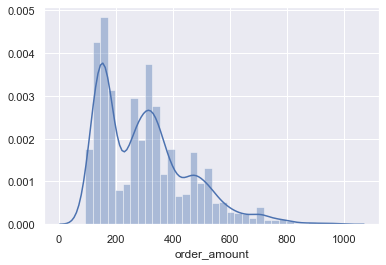

In [19]:
# check order amount distribution
sns.distplot(df['order_amount'])

In [20]:
print(f'AOV = $' + str(round(df['order_amount'].sum()/df['order_id'].count(),2)))

AOV = $301.84


In [21]:
#Average basket value
print(f'ABV = ' + str(round(df['total_items'].sum()/df['order_id'].count(),2)) +' items per basket')
#CLV
pf_n = len(df['order_id'].unique())/len(df['user_id'].unique())
aov_n = df['order_amount'].sum()/df['order_id'].count()
print(f'CLV = $' + str(round(aov_n*pf_n,2)))

ABV = 1.99 items per basket
CLV = $4941.09


## 1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

We now formula for AOV is: 

**Average Order Value = Total Revenue \ Number of Checkouts**

How we get number AOV of $3145.13? 

In [22]:
df = pd.read_csv('Data/data.csv')
# we take all payment and divide by count of orders
print(f'AOV = $' + str(round(df['order_amount'].sum()/df['order_id'].count(),2)))

AOV = $3145.13


Ok. It's look like correct for naive AOV calculation, if this data set contain information only about one store. But we have 100 different stores. What it can mean for us:
- stores can have different shoe brand
- each store can have their own discount program
- customer can love one store and avoid anothers

That mean better to calculate AOV for each store.

In [23]:
dd = df.groupby("shop_id")['order_amount'].agg(number='size').join(df.groupby('shop_id').sum())
dd

,number,order_id,user_id,order_amount,total_items
shop_id,,,,,
1,44,110641,36679,13588,86
2,55,126448,47370,9588,102
3,48,110682,40690,14652,99
4,51,140128,44189,13184,103
5,45,112423,38800,13064,92
...,...,...,...,...,...
96,51,127305,44136,16830,110
97,48,120413,40542,15552,96
98,58,143310,50274,14231,107


In [24]:
# Check this function using pivot table
df1 = pd.pivot_table(df, index=['shop_id'], values=['order_amount','total_items'],aggfunc=np.sum)
df2 = pd.pivot_table(df, index=['shop_id'], values='order_id',aggfunc=len)
df3 = pd.pivot_table(df, index=['shop_id'], values='user_id',aggfunc='nunique')
aov = pd.concat([df1,df2,df3],axis=1)
aov['store_aov'] = round(aov['order_amount']/aov['order_id'],2)
aov.drop('shop_id', axis=1, inplace=True)
aov.rename(columns={'order_amount':'total_revenue', 'total_items':'total_sold', 'order_id':'total_orders', 'user_id':'total_unique_users'}, inplace=True)
aov

,total_revenue,total_sold,total_orders,total_unique_users,store_aov
shop_id,,,,,
1,13588,86,44,42,308.82
2,9588,102,55,51,174.33
3,14652,99,48,48,305.25
4,13184,103,51,45,258.51
5,13064,92,45,44,290.31
...,...,...,...,...,...
96,16830,110,51,47,330.00
97,15552,96,48,42,324.00
98,14231,107,58,53,245.36


In [25]:
aov.sort_values(by='store_aov',ascending=True)

,total_revenue,total_sold,total_orders,total_unique_users,store_aov
shop_id,,,,,
92,6840,76,42,40,162.86
2,9588,102,55,51,174.33
32,7979,79,42,39,189.98
100,8547,77,40,36,213.68
53,14560,130,68,60,214.12
...,...,...,...,...,...
38,13680,72,35,34,390.86
90,19758,111,49,45,403.22
50,17756,92,44,40,403.55


In [26]:
df[df['shop_id']==92].sort_values(by='user_id',ascending=True)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2128,2129,92,729,180,2,credit_card,2017-03-03 17:26:32
3363,3364,92,730,90,1,credit_card,2017-03-11 23:20:31
1659,1660,92,738,180,2,cash,2017-03-11 18:38:53
4219,4220,92,747,90,1,credit_card,2017-03-25 20:16:58
228,229,92,757,90,1,debit,2017-03-13 23:57:51
3915,3916,92,760,180,2,cash,2017-03-26 15:44:40
2182,2183,92,761,180,2,credit_card,2017-03-16 15:33:09
322,323,92,783,90,1,debit,2017-03-08 3:49:15
158,159,92,795,90,1,credit_card,2017-03-29 3:07:12
4872,4873,92,803,180,2,cash,2017-03-17 6:21:04


In [27]:
df[df['shop_id']==42]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
834,835,42,792,352,1,cash,2017-03-25 21:31:25
835,836,42,819,704,2,cash,2017-03-09 14:15:15
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45
979,980,42,744,352,1,debit,2017-03-12 13:09:04


How we can see now AOV for stores very different:
- max AOV has store number 42 and it eqaul \$235101.49 
- min AOV has store number 92 and it equal \$162.86

Better to add more metrics for understanding what is going on with shop.

## What metric would you report for this dataset?
Depends of data set (fields dataset presented us) we can add two more metrics:

**Average basket value:**  How much money each customer bring to your store.

**Average basket value = Total Sold Items / Number of Checkouts**


**Customer lifetime value:** How much profit can bring future relationship with a customer.

**Customer Value = Average Order Value x Purchase Frequency**

Where: 
**Purchase Frequency = Total Orders / Total Customers**

Naive calcultion for this metrics:

In [28]:
#Average basket value
print(f'ABV = ' + str(round(df['total_items'].sum()/df['order_id'].count(),2)) +' items per basket')
#CLV
pf_n = len(df['order_id'].unique())/len(df['user_id'].unique())
aov_n = df['order_amount'].sum()/df['order_id'].count()
print(f'CLV = $' + str(round(aov_n*pf_n,2)))

ABV = 8.79 items per basket
CLV = $52244.65


**BUT!!!** 

We have 100 different shops. Each shop can provide their own policy about increasing avarage order value, ads and practical strategies for customers:

In [29]:
#calculate ABV for each store
aov['ABV'] = round(aov['total_sold']/aov['total_orders'],2)
aov

,total_revenue,total_sold,total_orders,total_unique_users,store_aov,ABV
shop_id,,,,,,
1,13588,86,44,42,308.82,1.95
2,9588,102,55,51,174.33,1.85
3,14652,99,48,48,305.25,2.06
4,13184,103,51,45,258.51,2.02
5,13064,92,45,44,290.31,2.04
...,...,...,...,...,...,...
96,16830,110,51,47,330.00,2.16
97,15552,96,48,42,324.00,2.00
98,14231,107,58,53,245.36,1.84


In [30]:
#calculate CLV for each store
aov['CLV']=round((aov['total_orders']/aov['total_unique_users'])*aov['store_aov'],2)
aov

,total_revenue,total_sold,total_orders,total_unique_users,store_aov,ABV,CLV
shop_id,,,,,,,
1,13588,86,44,42,308.82,1.95,323.53
2,9588,102,55,51,174.33,1.85,188.00
3,14652,99,48,48,305.25,2.06,305.25
4,13184,103,51,45,258.51,2.02,292.98
5,13064,92,45,44,290.31,2.04,296.91
...,...,...,...,...,...,...,...
96,16830,110,51,47,330.00,2.16,358.09
97,15552,96,48,42,324.00,2.00,370.29
98,14231,107,58,53,245.36,1.84,268.51


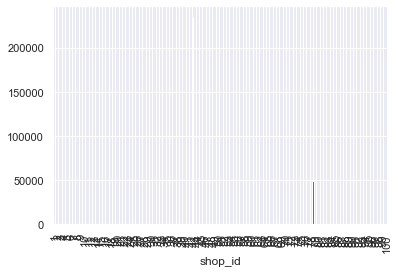

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure()
aov['store_aov'].plot(kind= 'bar')#'store_aov')
plt.show()

In [32]:
import seaborn as sns
sns.set()

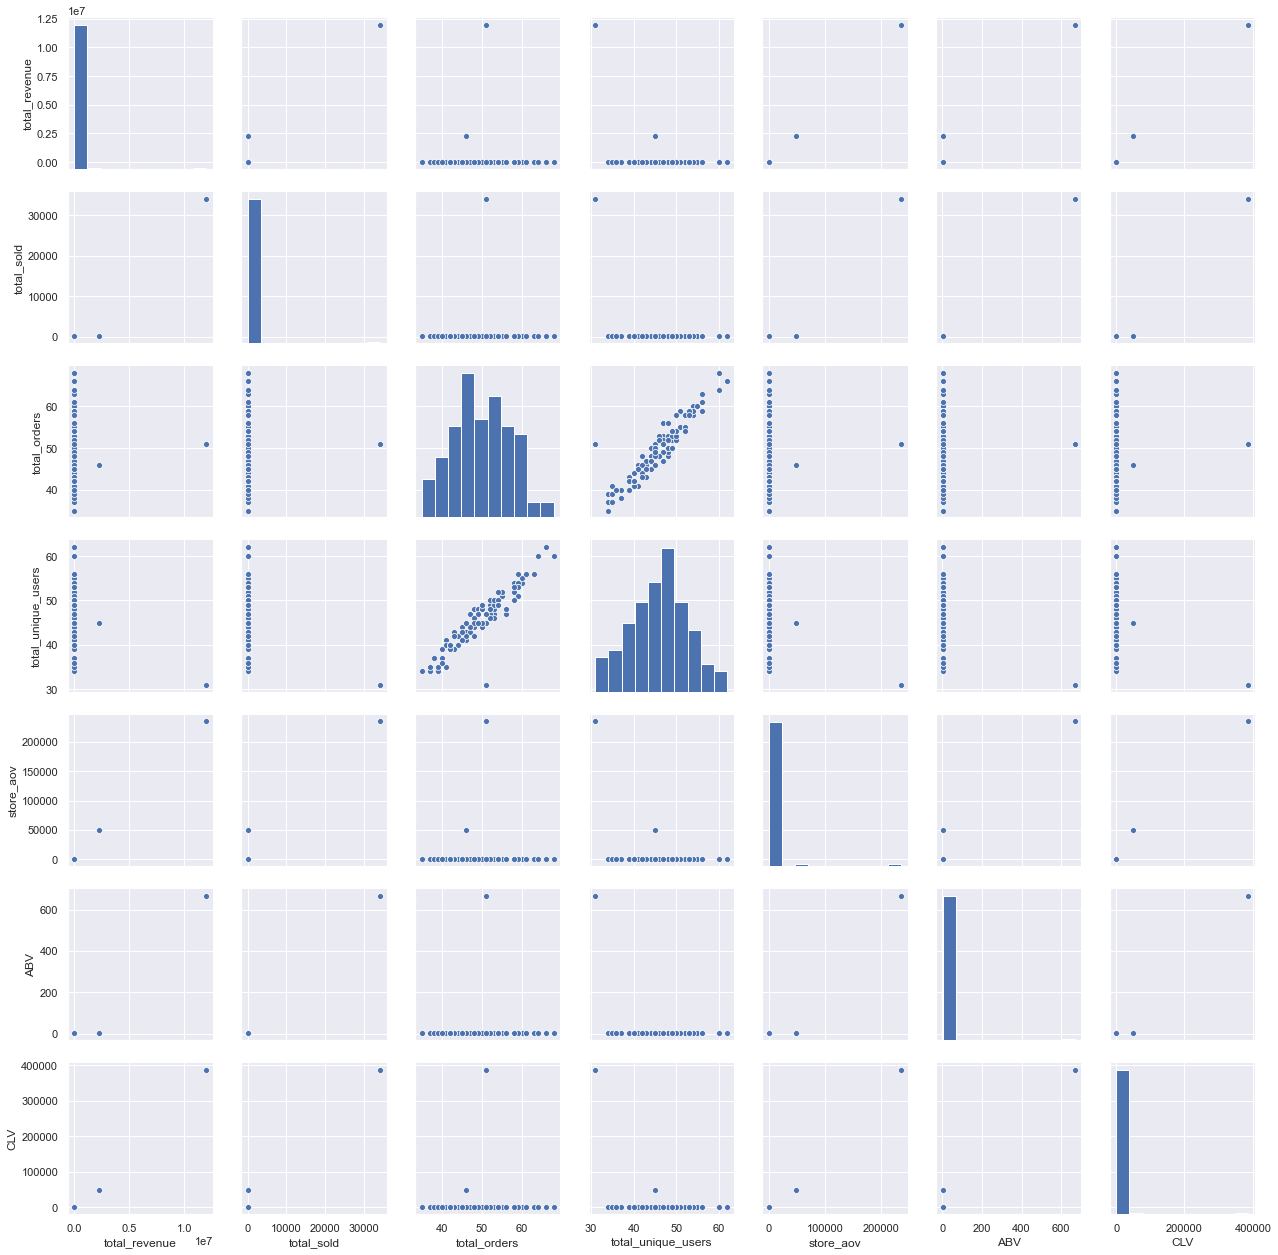

In [33]:
sns.pairplot(aov, height=2.5);